# Installs & Imports

## TF Settings

In [2]:
# import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Force TF to run on CPU
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

Concurrent usage of LightGBM with GPU/CUDA support and TensorFlow/Keras with GPU/CUDA support led to issues with TensorFlow/Keras (DNN library initialization error). Not sure how to resolve the discrepancies, so we will force TensorFlow/Keras to run on CPU.

## OpenCL GPU

In [4]:
# !pip install -q lightgbm dask[dataframe]

In [5]:
# # Install to run LightGBM on GPU
# !mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

In [6]:
# # Test running LightGBM on GPU
# import lightgbm as lgb
# from sklearn.datasets import make_regression

# X, y = make_regression(n_samples=10_000)
# dtrain = lgb.Dataset(X, label=y)
# bst = lgb.train(
#     params={
#         "objective": "regression",
#         "device": "gpu",
#         "verbose": 1
#     },
#     train_set=dtrain,
#     num_boost_round=5
# )

## CUDA

In [7]:
# Uninstall any existing LightGBM installation
!pip uninstall -y lightgbm

# Install to run LightGBM on CUDA
!pip install \
    --force-reinstall \
    --no-binary lightgbm \
    --config-settings=cmake.define.USE_CUDA=ON \
    lightgbm \
    --no-deps

!pip install -q dask[dataframe]

Found existing installation: lightgbm 4.5.0
Uninstalling lightgbm-4.5.0:
  Successfully uninstalled lightgbm-4.5.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.6.0-py3-none-linux_x86_64.whl size=61748399 sha256=290491c3964b2f92e926dc9d6848f77aefbbee5e85fdc6c0e35fae2d95b04e78
  Stored in directory: /root/.cache/pip/wheels/ee/da/90/bd694ce19848ae41071e6c926d1650e4581556bf5869a57fe0
Successfully built lightgbm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.1 MB/s eta 0:00:00


In [8]:
# Test running LightGBM on CUDA
import lightgbm as lgb
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10_000)
dtrain = lgb.Dataset(X, label=y)
bst = lgb.train(
    params={
        "objective": "regression",
        "device": "cuda",
        "verbose": 1
    },
    train_set=dtrain,
    num_boost_round=5
)

[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 100
[LightGBM] [Info] Start training from score 0.523529


In [9]:
!nvcc --version  # Check CUDA version
!nvidia-smi      # Check GPU and driver status

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Wed Feb 19 14:38:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P0       

## More Installs

In [10]:
# Need to install for pyrfr
!apt-get update
!apt-get install -y swig3.0

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,610 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,230 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubun

In [11]:
# Symbolic link
!ln -sf /usr/bin/swig3.0 /usr/bin/swig

In [12]:
# Need to install for smac
!pip install -q pyrfr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.1/295.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [13]:
!pip install -q optuna==4.2.0 optunahub optuna-integration smac==2.2.0 scipy torch gpytorch botorch cmaes jax jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from keras.wrappers import SKLearnClassifier

from lightgbm import LGBMClassifier

import botorch
import cmaes

import optuna
from optuna.samplers import TPESampler, GPSampler, CmaEsSampler
from optuna.exceptions import ExperimentalWarning
import optunahub
import optuna_integration
from optuna_integration import BoTorchSampler

import pyrfr
import smac

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ExperimentalWarning)

np.random.seed(42)

In [15]:
from tensorflow.python.platform import build_info as tf_build_info
from platform import python_version

print(f"TensorFlow build:\n{tf_build_info.build_info}")
print(f"\nPhysical devices: {tf.config.list_physical_devices('GPU')}")
print(f"\nPython version: {python_version()}")
print(f"TensorFlow version: {tf.__version__}")
print(f"\nLightGBM CUDA-linked library:\n{lgb.basic._LIB}")

TensorFlow build:
OrderedDict([('cpu_compiler', '/usr/lib/llvm-18/bin/clang'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12.5.1'), ('cudnn_version', '9'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False)])

Physical devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Python version: 3.11.11
TensorFlow version: 2.18.0

LightGBM CUDA-linked library:
<CDLL '/usr/local/lib/python3.11/dist-packages/lightgbm/lib/lib_lightgbm.so', handle a72e760 at 0x7ac839659750>


# Data Loading

In [17]:
# Load the MNIST dataset
(X_train_raw, y_train), (X_test_raw, y_test) = mnist.load_data()

# Combine training and test sets into a complete dataset
X_all = np.concatenate([X_train_raw, X_test_raw], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)

# Flatten images to 784-dimensional vectors
X_all_flat = X_all.reshape(-1, 28*28)

# Create column names for features
feature_columns = [f"pixel_{i}" for i in range(28*28)]

# Create a DataFrame with features and corresponding label
df_mnist = pd.DataFrame(X_all_flat, columns=feature_columns)
df_mnist["label"] = y_all

# Change the order so the label column is first
df_mnist = df_mnist.reindex(columns=['label'] + feature_columns)

# Display the DataFrame
display(df_mnist.head())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


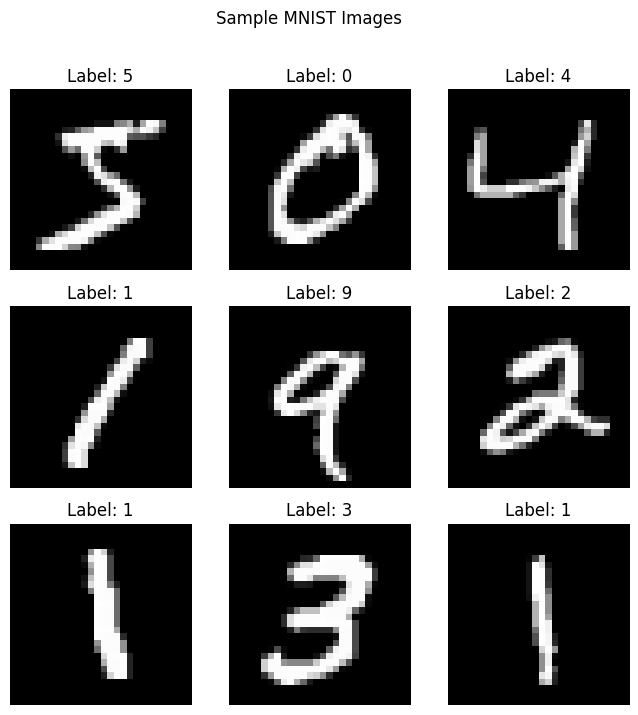

In [18]:
# Visualize 9 sample MNIST images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_all[i], cmap="gray")
    plt.title(f"Label: {y_all[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Images")
plt.show()

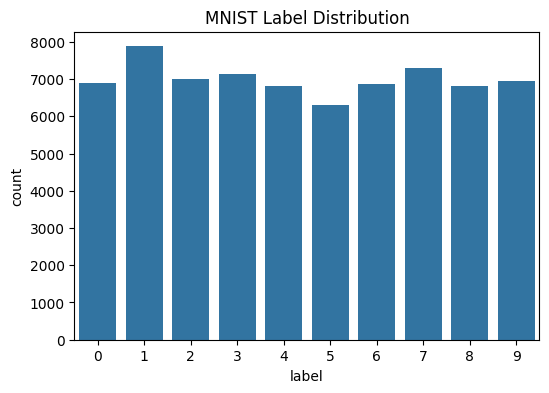

In [19]:
# Plot the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=df_mnist["label"])
plt.title("MNIST Label Distribution")
plt.show()

# Data Preparation

In [20]:
# Normalize pixel values to [0, 1]
X_all_norm = df_mnist[feature_columns].astype("float32") / 255.0
y_all = df_mnist["label"]

In [21]:
# Re-split into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_all_norm,
    y_all,
    test_size=0.2,
    random_state=42,
    stratify=y_all
)

In [22]:
# Print the shapes
print("Training Data Shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nTesting Data Shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training Data Shapes:
X_train: (56000, 784)
y_train: (56000,)

Testing Data Shapes:
X_test: (14000, 784)
y_test: (14000,)


# Model Definition

In [23]:
def build_lgb_model(params=None):
    if params is None:
        params = {
            "n_estimators": 100,
            "num_leaves": 31,
            "learning_rate": 0.1,
            "verbose": -1,
            "device": "cuda"
        }
    model = LGBMClassifier(
        n_estimators=params["n_estimators"],
        num_leaves=params["num_leaves"],
        learning_rate=params["learning_rate"],
        verbose=params["verbose"],
        device=params["device"]
    )
    return model

In [24]:
def build_cnn_model(X, y, input_shape=(28*28,), num_classes=10, conv_filters=32, dense_units=64, lr=1e-3, **kwargs):
    inp = Input(shape=input_shape)  # expects flattened input (784,)
    x = Reshape((28, 28, 1))(inp)  # reshape to (28, 28, 1) for the CNN layers
    x = Conv2D(conv_filters, (3, 3), activation="relu")(x)  # first conv layer
    x = MaxPooling2D((2, 2))(x)  # first pooling
    x = Conv2D(conv_filters*2, (3, 3), activation="relu")(x)  # second conv layer
    x = MaxPooling2D((2, 2))(x)  # second pooling
    x = Flatten()(x)  # flatten output
    x = Dense(dense_units, activation="relu")(x)  # dense layer
    out = Dense(num_classes, activation="softmax")(x)  # output layer
    model = Model(inp, out)
    model.compile(
        optimizer=AdamW(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [23]:
print("Validating LightGBM model...")
lgb_model = build_lgb_model()
lgb_model.fit(X_train, y_train)
preds_lgb = lgb_model.predict(X_test)
acc_lgb = accuracy_score(y_test, preds_lgb)
print(f"LightGBM Accuracy: {acc_lgb:.4f}")

Validating LightGBM model...
LightGBM Accuracy: 0.9760


In [24]:
print("Validating CNN model...")
cnn_clf = SKLearnClassifier(
    model=build_cnn_model,
    model_kwargs={
        "input_shape": (28*28,),
        "num_classes": 10,
        "conv_filters": 32,
        "dense_units": 64,
        "lr": 1e-3
    },
    fit_kwargs={
        "epochs": 10,
        "batch_size": 32,
        "verbose": 1
    }
)
cnn_clf.fit(X_train, y_train)
preds_cnn = cnn_clf.predict(X_test)
acc_cnn = accuracy_score(y_test, preds_cnn)
print(f"\nCNN Accuracy: {acc_cnn:.4f}")

Validating CNN model...
Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 259s 147ms/step - accuracy: 0.8903 - loss: 0.3451
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 239s 136ms/step - accuracy: 0.9845 - loss: 0.0516
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 234s 134ms/step - accuracy: 0.9889 - loss: 0.0351
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 231s 132ms/step - accuracy: 0.9921 - loss: 0.0245
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 233s 133ms/step - accuracy: 0.9947 - loss: 0.0178
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 230s 131ms/step - accuracy: 0.9961 - loss: 0.0129
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 235s 134ms/step - accuracy: 0.9962 - loss: 0.0108
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 233s 133ms/step - accuracy: 0.9972 - loss: 0.0083
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 229s 131ms/step - accuracy: 0.9975 - loss: 0.0080
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 234s 134ms/step - accuracy: 0.9977 - loss: 0.0078
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

CNN Accuracy:

# Objective Functions

In [25]:
def objective_lgb(trial: optuna.Trial) -> float:
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "verbose": -1,
        "device": "cuda"
    }
    model = build_lgb_model(params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

In [26]:
def objective_cnn(trial: optuna.Trial) -> float:
    conv_filters = trial.suggest_int("conv_filters", 16, 64)
    dense_units = trial.suggest_int("dense_units", 32, 128)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    epochs = trial.suggest_int("epochs", 5, 15)
    batch_size = trial.suggest_int("batch_size", 16, 128, log=True)
    clf = SKLearnClassifier(
        model=build_cnn_model,
        model_kwargs={
            "input_shape": (28*28,),
            "num_classes": 10,
            "conv_filters": conv_filters,
            "dense_units": dense_units,
            "lr": lr
        },
        fit_kwargs={
            "epochs": epochs,
            "batch_size": batch_size,
            "verbose": 0
        }
    )
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# Hyperparameter Tuning

In [27]:
# Define samplers
smac_mod = optunahub.load_module("samplers/smac_sampler")
gwo_mod = optunahub.load_module("samplers/grey_wolf_optimization")

SMACSampler = smac_mod.SMACSampler
GWOSampler = gwo_mod.GreyWolfOptimizationSampler

smac_dict_lgb = {
    "n_estimators": optuna.distributions.IntDistribution(50, 300),
    "num_leaves": optuna.distributions.IntDistribution(20, 100),
    "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.2, log=True),
}

samplers_lgb = {
    "TPESampler": TPESampler(),
    "CmaEsSampler": CmaEsSampler(),
    "GPSampler": GPSampler(),
    "BoTorchSampler": BoTorchSampler(),
    "SMACSampler": SMACSampler(smac_dict_lgb),
    "GWOSampler": GWOSampler(),
}

smac_dict_cnn = {
    "conv_filters": optuna.distributions.IntDistribution(16, 64),
    "dense_units": optuna.distributions.IntDistribution(32, 128),
    "lr": optuna.distributions.FloatDistribution(1e-4, 1e-2, log=True),
    "epochs": optuna.distributions.IntDistribution(5, 15),
    "batch_size": optuna.distributions.IntDistribution(16, 128, log=True),
}

samplers_cnn = {
    "TPESampler": TPESampler(),
    "CmaEsSampler": CmaEsSampler(),
    "GPSampler": GPSampler(),
    "BoTorchSampler": BoTorchSampler(),
    "SMACSampler": SMACSampler(smac_dict_cnn),
    "GWOSampler": GWOSampler(),
}

[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 50 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.


In [28]:
def run_studies(objective, sampler_dict, n_trials=5):
    best_params = {}
    for name, sampler in sampler_dict.items():
        sampler_instance = sampler() if isinstance(sampler, type) else sampler
        study = optuna.create_study(direction="maximize", sampler=sampler_instance)
        study.optimize(objective, n_trials=n_trials)
        best_params[name] = study.best_trial.params
        print(f"Best params for {objective.__name__} with {name}: {study.best_trial.params}")
        print("\n\n")
        time.sleep(3)

    return best_params

In [29]:
# Run tuning for each model
print("Tuning LightGBM models...")
time.sleep(3)
best_params_lgb = run_studies(objective_lgb, samplers_lgb, n_trials=3)

time.sleep(3)
print("\nTuning CNN models...")
time.sleep(3)
best_params_cnn = run_studies(objective_cnn, samplers_cnn, n_trials=3)

Tuning LightGBM models...


[I 2025-02-19 02:22:58,832] A new study created in memory with name: no-name-8612ae65-7e7e-48ac-9962-0e1a78141553
[I 2025-02-19 02:28:39,369] Trial 0 finished with value: 0.9767678893352483 and parameters: {'n_estimators': 280, 'num_leaves': 30, 'learning_rate': 0.05358498952206787}. Best is trial 0 with value: 0.9767678893352483.
[I 2025-02-19 02:32:45,717] Trial 1 finished with value: 0.9773214499221424 and parameters: {'n_estimators': 241, 'num_leaves': 65, 'learning_rate': 0.15867164879669876}. Best is trial 1 with value: 0.9773214499221424.
[I 2025-02-19 02:39:07,869] Trial 2 finished with value: 0.9277857812051401 and parameters: {'n_estimators': 129, 'num_leaves': 88, 'learning_rate': 0.0020336751616209054}. Best is trial 1 with value: 0.9773214499221424.


Best params for objective_lgb with TPESampler: {'n_estimators': 241, 'num_leaves': 65, 'learning_rate': 0.15867164879669876}





[I 2025-02-19 02:39:10,871] A new study created in memory with name: no-name-755d8221-7b79-4884-9e8c-ed86dacaa5ee
[I 2025-02-19 02:49:17,046] Trial 0 finished with value: 0.9387143315943871 and parameters: {'n_estimators': 182, 'num_leaves': 96, 'learning_rate': 0.0027189454826265056}. Best is trial 0 with value: 0.9387143315943871.
[I 2025-02-19 02:56:32,577] Trial 1 finished with value: 0.9651250229373516 and parameters: {'n_estimators': 206, 'num_leaves': 58, 'learning_rate': 0.01721173785706532}. Best is trial 1 with value: 0.9651250229373516.
[I 2025-02-19 03:03:08,096] Trial 2 finished with value: 0.9455714658460556 and parameters: {'n_estimators': 191, 'num_leaves': 58, 'learning_rate': 0.0059621172857986125}. Best is trial 1 with value: 0.9651250229373516.


Best params for objective_lgb with CmaEsSampler: {'n_estimators': 206, 'num_leaves': 58, 'learning_rate': 0.01721173785706532}





[I 2025-02-19 03:03:11,098] A new study created in memory with name: no-name-a43da27a-7395-4b44-a08a-383b137e9628
[I 2025-02-19 03:06:09,510] Trial 0 finished with value: 0.9756071613368141 and parameters: {'n_estimators': 88, 'num_leaves': 59, 'learning_rate': 0.14008707299757336}. Best is trial 0 with value: 0.9756071613368141.
[I 2025-02-19 03:07:56,450] Trial 1 finished with value: 0.8927322005065985 and parameters: {'n_estimators': 145, 'num_leaves': 20, 'learning_rate': 0.0021559527292986293}. Best is trial 0 with value: 0.9756071613368141.
[I 2025-02-19 03:16:17,245] Trial 2 finished with value: 0.9588750340942792 and parameters: {'n_estimators': 177, 'num_leaves': 81, 'learning_rate': 0.012280390827268832}. Best is trial 0 with value: 0.9756071613368141.


Best params for objective_lgb with GPSampler: {'n_estimators': 88, 'num_leaves': 59, 'learning_rate': 0.14008707299757336}





[I 2025-02-19 03:16:20,246] A new study created in memory with name: no-name-a54df908-7388-41d4-abb9-8278c8dba13b
[I 2025-02-19 03:21:43,369] Trial 0 finished with value: 0.9635535975537532 and parameters: {'n_estimators': 134, 'num_leaves': 70, 'learning_rate': 0.02292443452635111}. Best is trial 0 with value: 0.9635535975537532.
[I 2025-02-19 03:30:10,082] Trial 1 finished with value: 0.9687143010007286 and parameters: {'n_estimators': 199, 'num_leaves': 71, 'learning_rate': 0.023352242548466923}. Best is trial 1 with value: 0.9687143010007286.
[I 2025-02-19 03:34:39,539] Trial 2 finished with value: 0.9726785733244462 and parameters: {'n_estimators': 137, 'num_leaves': 56, 'learning_rate': 0.054341131708659576}. Best is trial 2 with value: 0.9726785733244462.


Best params for objective_lgb with BoTorchSampler: {'n_estimators': 137, 'num_leaves': 56, 'learning_rate': 0.054341131708659576}





[I 2025-02-19 03:34:42,540] A new study created in memory with name: no-name-916d39ee-1848-436d-8275-23c095f1f221


[INFO][abstract_intensifier.py:306] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:516] Added config c3f701 as new incumbent because there are no incumbents yet.


[I 2025-02-19 03:36:22,891] Trial 0 finished with value: 0.976928603621065 and parameters: {'n_estimators': 133, 'num_leaves': 20, 'learning_rate': 0.1633212753179}. Best is trial 0 with value: 0.976928603621065.
[I 2025-02-19 03:46:28,112] Trial 1 finished with value: 0.953767888682813 and parameters: {'n_estimators': 246, 'num_leaves': 67, 'learning_rate': 0.0068634535215}. Best is trial 0 with value: 0.976928603621065.
[I 2025-02-19 03:48:37,161] Trial 2 finished with value: 0.898160785969495 and parameters: {'n_estimators': 65, 'num_leaves': 59, 'learning_rate': 0.0016495117439}. Best is trial 0 with value: 0.976928603621065.


Best params for objective_lgb with SMACSampler: {'n_estimators': 133, 'num_leaves': 20, 'learning_rate': 0.1633212753179}





[I 2025-02-19 03:48:40,162] A new study created in memory with name: no-name-b3142f9f-7f33-4a22-aef2-78ecce4f1f17
[I 2025-02-19 03:57:11,933] Trial 0 finished with value: 0.9685892917530348 and parameters: {'n_estimators': 187, 'num_leaves': 77, 'learning_rate': 0.024376795198947098}. Best is trial 0 with value: 0.9685892917530348.
[I 2025-02-19 04:03:42,548] Trial 1 finished with value: 0.9620714610733301 and parameters: {'n_estimators': 156, 'num_leaves': 72, 'learning_rate': 0.01793876531448651}. Best is trial 0 with value: 0.9685892917530348.
[I 2025-02-19 04:20:07,384] Trial 2 finished with value: 0.9628750181526678 and parameters: {'n_estimators': 273, 'num_leaves': 98, 'learning_rate': 0.010160177584759029}. Best is trial 0 with value: 0.9685892917530348.


Best params for objective_lgb with GWOSampler: {'n_estimators': 187, 'num_leaves': 77, 'learning_rate': 0.024376795198947098}




Tuning CNN models...


[I 2025-02-19 04:20:16,387] A new study created in memory with name: no-name-01a02f03-2002-495f-8a36-aa0e8138e09e


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 109s 92ms/step - accuracy: 0.8808 - loss: 0.3891
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 106s 90ms/step - accuracy: 0.8852 - loss: 0.3735
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 104s 88ms/step - accuracy: 0.8802 - loss: 0.3892
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2025-02-19 04:25:44,754] Trial 0 finished with value: 0.976125014015636 and parameters: {'conv_filters': 19, 'dense_units': 94, 'lr': 0.0016074382622105342, 'epochs': 5, 'batch_size': 31}. Best is trial 0 with value: 0.976125014015636.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 306s 261ms/step - accuracy: 0.9077 - loss: 0.2816
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 302s 257ms/step - accuracy: 0.8967 - loss: 0.3187
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 307s 261ms/step - accuracy: 0.9009 - loss: 0.3169
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


[I 2025-02-19 04:41:15,659] Trial 1 finished with value: 0.9817857008810015 and parameters: {'conv_filters': 59, 'dense_units': 92, 'lr': 0.0015972696406334947, 'epochs': 5, 'batch_size': 34}. Best is trial 1 with value: 0.9817857008810015.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 304s 259ms/step - accuracy: 0.8703 - loss: 0.4693
584/584 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 302s 258ms/step - accuracy: 0.8545 - loss: 0.4898
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 298s 254ms/step - accuracy: 0.8620 - loss: 0.4616
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


[I 2025-02-19 04:56:37,837] Trial 2 finished with value: 0.9739821482615647 and parameters: {'conv_filters': 59, 'dense_units': 71, 'lr': 0.00040924379913446867, 'epochs': 12, 'batch_size': 16}. Best is trial 1 with value: 0.9817857008810015.


Best params for objective_cnn with TPESampler: {'conv_filters': 59, 'dense_units': 92, 'lr': 0.0015972696406334947, 'epochs': 5, 'batch_size': 34}





[I 2025-02-19 04:56:40,838] A new study created in memory with name: no-name-2b30806d-9187-4fa4-bf6d-1cc4a2634017


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 180s 153ms/step - accuracy: 0.9070 - loss: 0.2924
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 178s 151ms/step - accuracy: 0.9034 - loss: 0.2986
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 178s 151ms/step - accuracy: 0.9118 - loss: 0.2849
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


[I 2025-02-19 05:05:47,861] Trial 0 finished with value: 0.9781785057247059 and parameters: {'conv_filters': 35, 'dense_units': 79, 'lr': 0.003923198886564563, 'epochs': 9, 'batch_size': 28}. Best is trial 0 with value: 0.9781785057247059.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 153s 130ms/step - accuracy: 0.8593 - loss: 0.4780
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 152s 129ms/step - accuracy: 0.8664 - loss: 0.4688
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 151s 128ms/step - accuracy: 0.8600 - loss: 0.4754
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


[I 2025-02-19 05:13:34,640] Trial 1 finished with value: 0.9738393108893777 and parameters: {'conv_filters': 29, 'dense_units': 83, 'lr': 0.0006208431106087642, 'epochs': 10, 'batch_size': 66}. Best is trial 0 with value: 0.9781785057247059.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 197s 168ms/step - accuracy: 0.9104 - loss: 0.2793
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 200s 170ms/step - accuracy: 0.9096 - loss: 0.2870
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 198s 168ms/step - accuracy: 0.9070 - loss: 0.2973
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


[I 2025-02-19 05:23:40,714] Trial 2 finished with value: 0.9817321304090457 and parameters: {'conv_filters': 39, 'dense_units': 70, 'lr': 0.0028068024860648704, 'epochs': 9, 'batch_size': 25}. Best is trial 2 with value: 0.9817321304090457.


Best params for objective_cnn with CmaEsSampler: {'conv_filters': 39, 'dense_units': 70, 'lr': 0.0028068024860648704, 'epochs': 9, 'batch_size': 25}





[I 2025-02-19 05:23:43,715] A new study created in memory with name: no-name-bfcb0d06-f05b-4973-8255-29a4aafab8d4


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 127s 108ms/step - accuracy: 0.8398 - loss: 0.5924
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 127s 108ms/step - accuracy: 0.8316 - loss: 0.5962
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 131s 111ms/step - accuracy: 0.8255 - loss: 0.6248
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2025-02-19 05:30:17,629] Trial 0 finished with value: 0.9680178992150484 and parameters: {'conv_filters': 24, 'dense_units': 117, 'lr': 0.0003525990176079008, 'epochs': 9, 'batch_size': 90}. Best is trial 0 with value: 0.9680178992150484.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 134s 114ms/step - accuracy: 0.8647 - loss: 0.4291
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 135s 114ms/step - accuracy: 0.8591 - loss: 0.4418
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 136s 115ms/step - accuracy: 0.8665 - loss: 0.4529
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


[I 2025-02-19 05:37:12,292] Trial 1 finished with value: 0.9766428829575037 and parameters: {'conv_filters': 25, 'dense_units': 120, 'lr': 0.0007459982331126381, 'epochs': 12, 'batch_size': 44}. Best is trial 1 with value: 0.9766428829575037.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 175s 149ms/step - accuracy: 0.7605 - loss: 0.8054
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 179s 151ms/step - accuracy: 0.7876 - loss: 0.7560
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 175s 148ms/step - accuracy: 0.7665 - loss: 0.8329
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


[I 2025-02-19 05:46:11,895] Trial 2 finished with value: 0.9564821268852263 and parameters: {'conv_filters': 34, 'dense_units': 33, 'lr': 0.00024752407717275977, 'epochs': 7, 'batch_size': 19}. Best is trial 1 with value: 0.9766428829575037.


Best params for objective_cnn with GPSampler: {'conv_filters': 25, 'dense_units': 120, 'lr': 0.0007459982331126381, 'epochs': 12, 'batch_size': 44}





[I 2025-02-19 05:46:14,896] A new study created in memory with name: no-name-8ab45439-a73c-4dde-a95f-c22a9d2ed09b


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 112s 94ms/step - accuracy: 0.6952 - loss: 1.0920
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 111s 94ms/step - accuracy: 0.6604 - loss: 1.1734
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 110s 93ms/step - accuracy: 0.6754 - loss: 1.1636
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


[I 2025-02-19 05:51:56,751] Trial 0 finished with value: 0.9366428481737192 and parameters: {'conv_filters': 20, 'dense_units': 61, 'lr': 0.00012358997843318363, 'epochs': 13, 'batch_size': 31}. Best is trial 0 with value: 0.9366428481737192.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 274s 233ms/step - accuracy: 0.8783 - loss: 0.3913
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 275s 234ms/step - accuracy: 0.9099 - loss: 0.3013
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 275s 235ms/step - accuracy: 0.8761 - loss: 0.4520
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


[I 2025-02-19 06:05:56,321] Trial 1 finished with value: 0.969535728297148 and parameters: {'conv_filters': 54, 'dense_units': 117, 'lr': 0.009807728119543425, 'epochs': 6, 'batch_size': 45}. Best is trial 1 with value: 0.969535728297148.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 135s 114ms/step - accuracy: 0.8890 - loss: 0.3373
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 138s 117ms/step - accuracy: 0.8949 - loss: 0.3330
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 135s 114ms/step - accuracy: 0.9044 - loss: 0.2942
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


[I 2025-02-19 06:12:54,317] Trial 2 finished with value: 0.974517861590971 and parameters: {'conv_filters': 26, 'dense_units': 66, 'lr': 0.009716012684509513, 'epochs': 5, 'batch_size': 50}. Best is trial 2 with value: 0.974517861590971.


Best params for objective_cnn with BoTorchSampler: {'conv_filters': 26, 'dense_units': 66, 'lr': 0.009716012684509513, 'epochs': 5, 'batch_size': 50}





[I 2025-02-19 06:12:57,319] A new study created in memory with name: no-name-be929e8a-7e80-41bc-be75-015728fef19e


[INFO][abstract_intensifier.py:306] Using only one seed for deterministic scenario.
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 191s 162ms/step - accuracy: 0.8593 - loss: 0.4748
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 208s 176ms/step - accuracy: 0.8570 - loss: 0.4791
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 202s 172ms/step - accuracy: 0.8573 - loss: 0.4821
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
[INFO][abstract_intensifier.py:516] Added config c6d0bb as new incumbent because there are no incumbents yet.


[I 2025-02-19 06:23:10,109] Trial 0 finished with value: 0.9735535376100808 and parameters: {'conv_filters': 38, 'dense_units': 45, 'lr': 0.0006991106642, 'epochs': 6, 'batch_size': 34}. Best is trial 0 with value: 0.9735535376100808.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 239s 204ms/step - accuracy: 0.8980 - loss: 0.3233
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 244s 208ms/step - accuracy: 0.8625 - loss: 0.4315
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 242s 206ms/step - accuracy: 0.8384 - loss: 0.4996
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


[I 2025-02-19 06:35:29,512] Trial 1 finished with value: 0.9630356243370644 and parameters: {'conv_filters': 46, 'dense_units': 114, 'lr': 0.0081593209737, 'epochs': 12, 'batch_size': 105}. Best is trial 0 with value: 0.9735535376100808.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 101s 85ms/step - accuracy: 0.8941 - loss: 0.3630
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 96s 81ms/step - accuracy: 0.8808 - loss: 0.3892
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 97s 82ms/step - accuracy: 0.8759 - loss: 0.4073
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[INFO][abstract_intensifier.py:595] Added config 4ff074 and rejected config c6d0bb as incumbent because it is not better than the incumbents on 1 instances:


[I 2025-02-19 06:40:32,144] Trial 2 finished with value: 0.9779821313633038 and parameters: {'conv_filters': 17, 'dense_units': 74, 'lr': 0.0016726008292, 'epochs': 10, 'batch_size': 99}. Best is trial 2 with value: 0.9779821313633038.


Best params for objective_cnn with SMACSampler: {'conv_filters': 17, 'dense_units': 74, 'lr': 0.0016726008292, 'epochs': 10, 'batch_size': 99}





[I 2025-02-19 06:40:35,145] A new study created in memory with name: no-name-fedb8926-3e50-45dc-9111-2fab04f749da


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 224s 190ms/step - accuracy: 0.8963 - loss: 0.3311
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 227s 193ms/step - accuracy: 0.9039 - loss: 0.3115
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 219s 186ms/step - accuracy: 0.9003 - loss: 0.3230
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


[I 2025-02-19 06:51:56,717] Trial 0 finished with value: 0.9800893188654448 and parameters: {'conv_filters': 42, 'dense_units': 101, 'lr': 0.0016051911333587634, 'epochs': 10, 'batch_size': 38}. Best is trial 0 with value: 0.9800893188654448.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 197s 167ms/step - accuracy: 0.8638 - loss: 0.4380
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 196s 167ms/step - accuracy: 0.8717 - loss: 0.4256
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 195s 166ms/step - accuracy: 0.8693 - loss: 0.4452
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


[I 2025-02-19 07:01:56,001] Trial 1 finished with value: 0.9747500175224748 and parameters: {'conv_filters': 37, 'dense_units': 118, 'lr': 0.0005846326121643416, 'epochs': 15, 'batch_size': 61}. Best is trial 0 with value: 0.9800893188654448.


1167/1167 ━━━━━━━━━━━━━━━━━━━━ 214s 182ms/step - accuracy: 0.7857 - loss: 0.8025
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 208s 177ms/step - accuracy: 0.7729 - loss: 0.8263
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 214s 182ms/step - accuracy: 0.7812 - loss: 0.8003
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


[I 2025-02-19 07:12:44,070] Trial 2 finished with value: 0.9585535777798032 and parameters: {'conv_filters': 41, 'dense_units': 87, 'lr': 0.00013869861245357332, 'epochs': 15, 'batch_size': 83}. Best is trial 0 with value: 0.9800893188654448.


Best params for objective_cnn with GWOSampler: {'conv_filters': 42, 'dense_units': 101, 'lr': 0.0016051911333587634, 'epochs': 10, 'batch_size': 38}





# Model Training

In [27]:
def train_lgb_model(params: dict):
    params.update({"verbose": -1, "device": "cuda"})
    model = build_lgb_model(params)
    model.fit(X_train, y_train)
    return model

In [28]:
def train_cnn_model(params: dict):
    clf = SKLearnClassifier(
        model=build_cnn_model,
        model_kwargs={
            "input_shape": (28*28,),
            "num_classes": 10,
            "conv_filters": params.get("conv_filters", 32),
            "dense_units": params.get("dense_units", 64),
            "lr": params.get("lr", 1e-3)
        },
        fit_kwargs={
            "epochs": params.get("epochs", 10),
            "batch_size": params.get("batch_size", 32),
            "verbose": 0
        }
    )
    clf.fit(X_train, y_train)
    return clf

In [29]:
def train_final_models(best_params_dict, train_func, model_tag):
    models = {}
    for sampler_name, params in tqdm(best_params_dict.items(), desc=f"Training {model_tag} Models"):
        try:
            model = train_func(params)
            models[f"{model_tag}_{sampler_name}"] = model
        except Exception as e:
            print(f"Error training model for {model_tag} with {sampler_name}: {e}")
    return models

In [33]:
# Train the models
final_lgb_models = train_final_models(best_params_lgb, train_lgb_model, "LGB")
final_cnn_models = train_final_models(best_params_cnn, train_cnn_model, "CNN")

Training LGB Models:   0%|          | 0/6 [00:00<?, ?it/s]

Training CNN Models:   0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
# Save the model dictionary objects
joblib.dump(final_lgb_models, "final_lgb_models.joblib")
joblib.dump(final_cnn_models, "final_cnn_models.joblib")

['final_cnn_models.joblib']

In [35]:
# Download the files
from google.colab import files

files.download("final_lgb_models.joblib")
files.download("final_cnn_models.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Load the model dictionary objects
final_lgb_models = joblib.load("final_lgb_models.joblib")
final_cnn_models = joblib.load("final_cnn_models.joblib")

In [31]:
# Combine all final models
final_models = {}
final_models.update(final_lgb_models)
final_models.update(final_cnn_models)

# Model Evaluation

In [32]:
# Metrics DataFrame
results = {}

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1 Score": f1_score(y_test, y_pred, average="macro")
    }

metrics_df = pd.DataFrame(results).T
print("Final Evaluation Metrics:")
display(metrics_df)

438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Final Evaluation Metrics:


,Accuracy,Precision,Recall,F1 Score
LGB_TPESampler,0.980000,0.979961,0.979886,0.979914
LGB_CmaEsSampler,0.965643,0.965491,0.965359,0.965411
LGB_GPSampler,0.978071,0.978067,0.977904,0.977970
LGB_BoTorchSampler,0.973786,0.973761,0.973556,0.973640
LGB_SMACSampler,0.979571,0.979514,0.979462,0.979477
LGB_GWOSampler,0.970214,0.970095,0.969971,0.970020
CNN_TPESampler,0.988643,0.988758,0.988618,0.988659
CNN_CmaEsSampler,0.988429,0.988397,0.988452,0.988407
CNN_GPSampler,0.989357,0.989538,0.989240,0.989356
CNN_BoTorchSampler,0.985357,0.985403,0.985252,0.985278


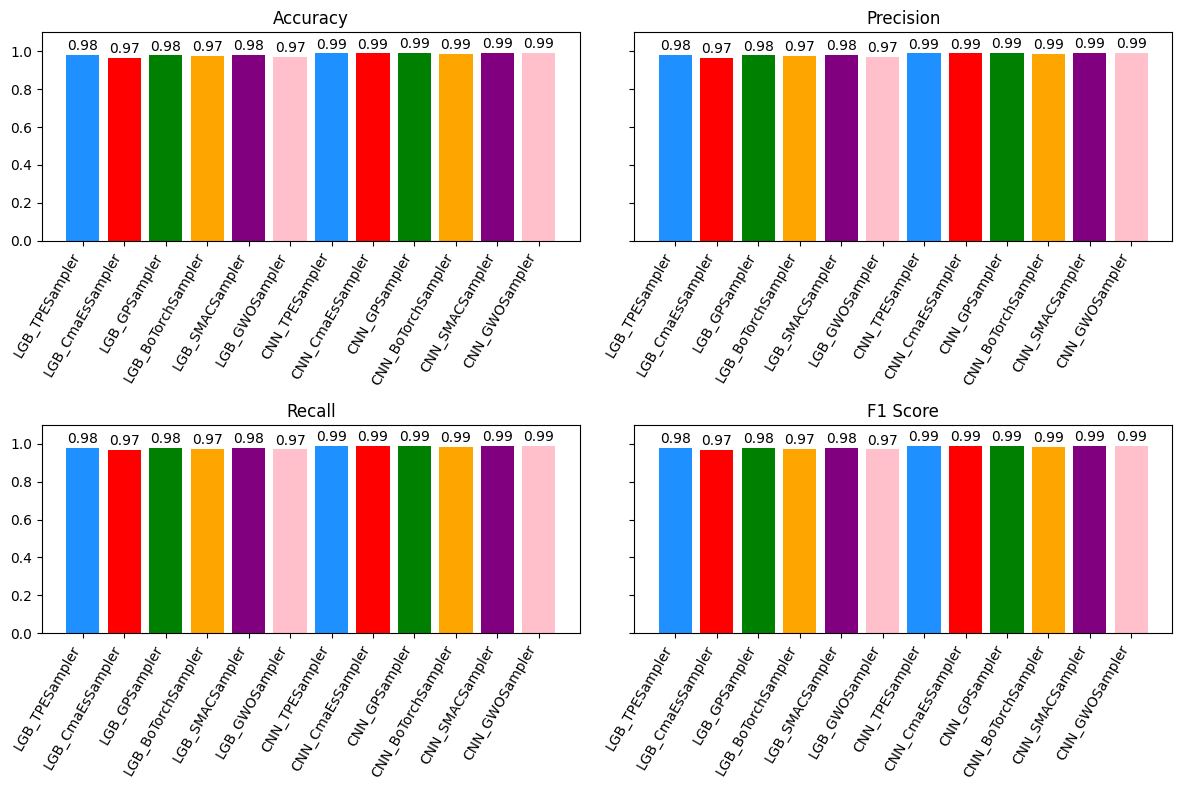

In [37]:
# Plot metrics
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score"]

sampler_colors = {
    "TPESampler": "dodgerblue",
    "CmaEsSampler": "red",
    "GPSampler": "green",
    "BoTorchSampler": "orange",
    "SMACSampler": "purple",
    "GWOSampler": "pink",
}

# Create a 2x2 grid of subplots (for the 4 metrics)
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.ravel()  # Flatten so we can iterate easily

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    bar_colors = []

    # Build color list based on sampler name in index
    for model_name in metrics_df.index:
        sampler = model_name.split("_")[-1]
        bar_colors.append(sampler_colors.get(sampler, "gray"))

    # Plot the bars
    bars = ax.bar(metrics_df.index, metrics_df[metric], color=bar_colors)

    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.01,
            f"{height:.2f}",
            ha="center",
            va="bottom"
        )

    ax.set_title(metric)
    ax.set_ylim(0, 1.1)

    # Rotate x-axis labels
    ax.set_xticklabels(metrics_df.index, rotation=60, ha="right")

plt.tight_layout()
plt.show()